In [ ]:
# for some basic operations
import numpy as np 
import pandas as pd 
from collections import Counter
import glob

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import folium
from folium import plugins
import gmaps 
import gmaps.datasets 
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from folium.plugins import HeatMap


In [2]:
import time
from geopy.geocoders import Nominatim
import re
from shapely.geometry import  Point
import geopandas as gpd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import os
import re
import contextily as ctx
import geoplot as gplt
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from pdpbox import pdp, get_dataset, info_plots
import shap

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = r'data\geopt_parking_violation' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0)
    li.append(frame)

df = pd.concat(li, axis=0, ignore_index=True)

In [5]:
#df = pd.read_csv("data/geopt_parking_violation/geopt_partial_parking_violation.csv")
df.head()

Summons Number   Plate ID Registration State Plate Type  Issue Date  \
0      1463779318    HGF1033                 NY        PAS  01/06/2020   
1      1463791094  RRR906088                 NY        PAS  02/10/2020   
2      1462215476    GUD1507                 NY        PAS  06/15/2020   
3      1462215531    HLD2806                 NY        PAS  06/16/2020   
4      1462227132    HXK1851                 NY        PAS  06/22/2020   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0              20               SDN        CADIL              X         26630   
1              20               SDN        INTER              X         26630   
2              20               SDN        CHEVR              X         26630   
3              20              SUBN        NISSA              X         26630   
4              20               SDN        TOYOT              X         26630   

   ...  Violation Post Code  Violation Description  \
0  ...                  NaN                    NaN   
1  ...                  NaN                    NaN   
2  ...                  NaN                    NaN   
3  ...                  NaN                    NaN   
4  ...                  NaN                    NaN   

   No Standing or Stopping Violation  Hydrant Violation  \
0                                NaN                NaN   
1                                NaN                NaN   
2                                NaN                NaN   
3                                NaN                NaN   
4                                NaN                NaN   

   Double Parking Violation              addr  \
0                       NaN  489 CLARKSON AVE   
1                       NaN  489 CLARKSON AVE   
2                       NaN  489 CLARKSON AVE   
3                       NaN  489 CLARKSON AVE   
4                       NaN  489 CLARKSON AVE   

                          geopoint   latitude  longitude  \
0  (40.65575723333333, -73.943163)  40.655757 -73.943163   
1  (40.65575723333333, -73.943163)  40.655757 -73.943163   
2  (40.65575723333333, -73.943163)  40.655757 -73.943163   
3  (40.65575723333333, -73.943163)  40.655757 -73.943163   
4  (40.65575723333333, -73.943163)  40.655757 -73.943163   

  Days Parking In Effect      
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 48 columns]

In [6]:
df.shape

(6584974, 48)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(5302033, 48)

In [9]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'addr', 'geopoint', 'latitude', 'l

In [10]:
df.isnull().sum()

Summons Number                             0
Plate ID                                  50
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                       3159
Vehicle Make                            9688
Issuing Agency                             0
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                    769494
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                        768972
Issuer Squad                          805828
Violation Time                            19
Time First Observed                  4984272
Violation County                        2495
Violation 

In [11]:
#Removing columns with mostly nan items and not required for the analysis
df = df.drop(columns=['Summons Number', 'Plate ID', 'Plate Type', 'Violation Code', 'Issuing Agency','Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Law Section', 'Sub Division', 'Violation Location','Issuer Precinct', 'Issuer Code', 'Date First Observed', 'Vehicle Color','Violation Location', 'Issuer Command', 'Issuer Squad', 'Time First Observed', 'Violation In Front Of Or Opposite', 'House Number', 'Street Name', 'Intersecting Street', 'Violation Legal Code', 'Days Parking In Effect', 'From Hours In Effect', 'To Hours In Effect', 'Unregistered Vehicle?', 'Meter Number', 'Feet From Curb', 'Violation Post Code', 'Violation Description', 'No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation', 'Days Parking In Effect    '])

In [12]:
df.isnull().sum()

Registration State       0
Issue Date               0
Vehicle Body Type     3159
Vehicle Make          9688
Violation Precinct       0
Violation Time          19
Violation County      2495
Vehicle Year             0
addr                     0
geopoint                 0
latitude                 0
longitude                0
dtype: int64

In [13]:
df.describe()

Violation Precinct  Vehicle Year      latitude     longitude
count        5.302033e+06  5.302033e+06  5.302033e+06  5.302033e+06
mean         4.486963e+01  1.759944e+03  4.081025e+01 -6.924413e+01
std          4.065844e+01  6.684394e+02  5.904895e+00  3.560840e+01
min          0.000000e+00  0.000000e+00 -5.493119e+01 -1.623143e+02
25%          1.000000e+01  2.007000e+03  4.064628e+01 -7.403676e+01
50%          2.800000e+01  2.014000e+03  4.075154e+01 -7.395724e+01
75%          8.100000e+01  2.018000e+03  4.086846e+01 -7.383756e+01
max          8.090000e+02  2.069000e+03  6.481368e+01  1.780026e+02

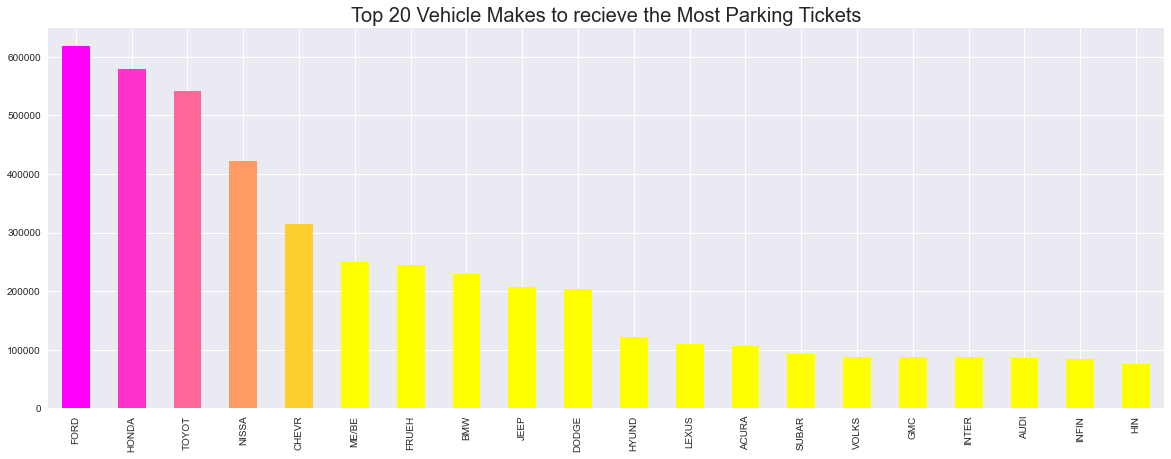

In [14]:
# Top 20 Vehicle Makes to recieve the Most Parking Tickets

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 20, 100))
df['Vehicle Make'].value_counts()[0:20].plot.bar(color = color, figsize = (20, 7))

plt.title('Top 20 Vehicle Makes to recieve the Most Parking Tickets',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

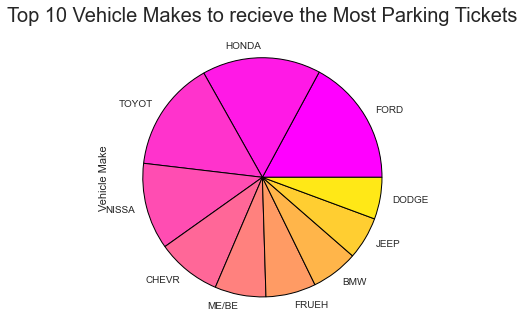

In [15]:
# Top 10 Vehicle Makes to recieve the Most Parking Tickets

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 10, 100))
#color = ['red', 'gray', 'blue', 'brown', 'green']
df['Vehicle Make'].value_counts()[0:10].plot.pie(colors=color, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' })

plt.title('Top 10 Vehicle Makes to recieve the Most Parking Tickets',fontsize = 20)

#plt.xticks(rotation = 90)
plt.show()

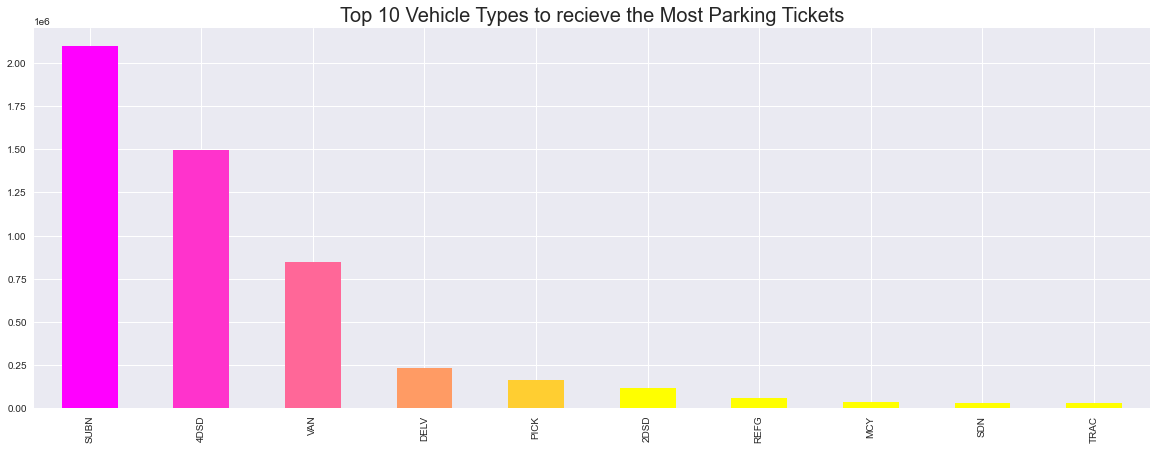

In [16]:
# Top 10 Vehicle Types to recieve the Most Parking Tickets

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 20, 100))
df['Vehicle Body Type'].value_counts()[0:10].plot.bar(color = color, figsize = (20, 7))

plt.title('Top 10 Vehicle Types to recieve the Most Parking Tickets',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

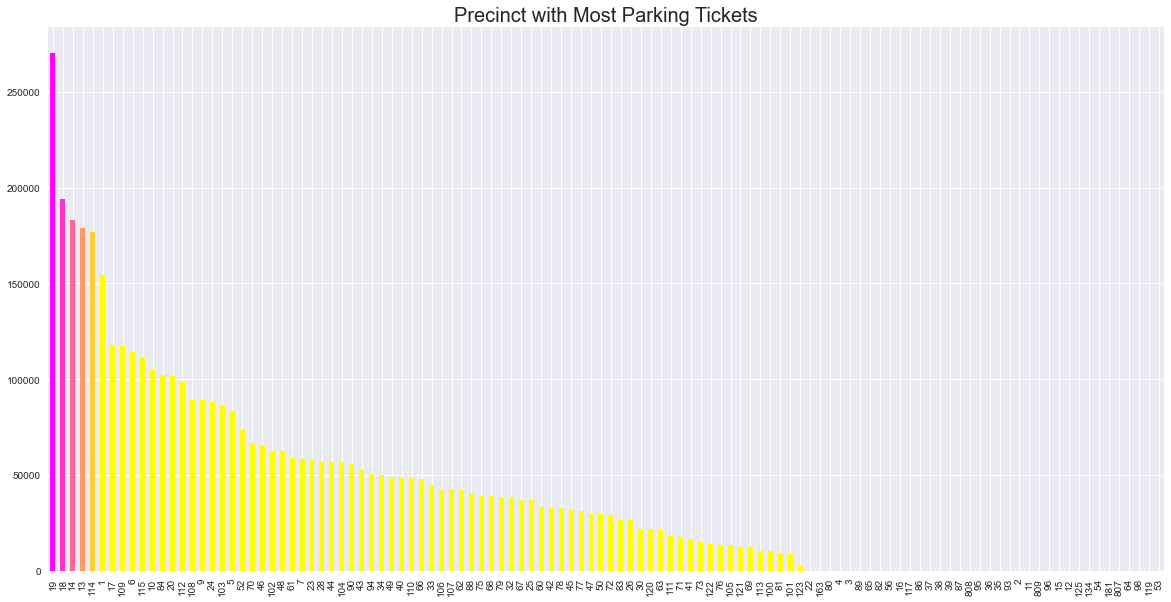

In [17]:
# Regions with count of parking tickets

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 20, 100))
df[df['Violation Precinct']!= 0]['Violation Precinct'].value_counts().plot.bar(color = color, figsize = (20, 10))

plt.title('Precinct with Most Parking Tickets',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

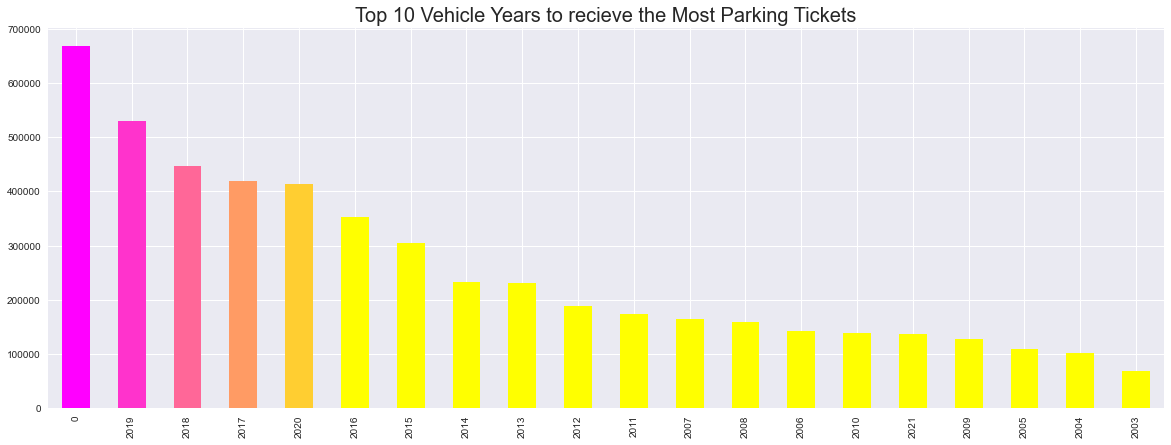

In [18]:
# Top 10 Vehicle Types to recieve the Most Parking Tickets

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 20, 100))
df['Vehicle Year'].value_counts()[0:20].plot.bar(color = color, figsize = (20, 7))

plt.title('Top 10 Vehicle Years to recieve the Most Parking Tickets',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [19]:
df['Date'] = pd.to_datetime(df['Issue Date'])
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.strftime('%b')
df['Year'] = df['Date'].dt.year


In [20]:
print(Counter(df['Year']))

Counter({2020: 3071093, 2021: 2230895, 2022: 25, 2023: 6, 2024: 4, 2017: 2, 2012: 2, 2027: 1, 2011: 1, 2029: 1, 2025: 1, 2007: 1, 2000: 1})


In [21]:
start_date = "2020-01-01"
end_date = "2021-12-31"

after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
df = df.loc[between_two_dates]

In [22]:
print(Counter(df['Violation Time'].str.slice(0,2)))

Counter({'08': 628159, '01': 619199, '09': 560211, '11': 503435, '02': 501961, '12': 484020, '10': 464643, '07': 405735, '03': 337196, '06': 276061, '04': 261647, '05': 238830, '00': 20864, nan: 19, '48': 2, '.3': 1, '20': 1, '56': 1, '15': 1, '82': 1, '73': 1})


In [23]:
df.dropna(subset=['Violation Time'], inplace=True)

In [24]:
df = df[df['Violation Time'].str.slice(0,2) != '.3']

In [25]:
after_start = df['Violation Time'].str.slice(0,2).astype(int) >= 0
before_end = df['Violation Time'].str.slice(0,2).astype(int) <= 12
between_two = after_start & before_end
df = df.loc[between_two]

In [26]:
df.loc[df['Violation Time'].str.slice(4,6) == 'A','Hour'] = df['Violation Time'].str.slice(0,2).astype(int)
df.loc[df['Violation Time'].str.slice(4,6) == 'P','Hour'] = df['Violation Time'].str.slice(0,2).astype(int) + 12
df.loc[df['Hour'] == 24,'Hour'] = 12


In [27]:
print(sorted(Counter(df['Hour']).items()))

[(0.0, 20851), (1.0, 25844), (2.0, 18973), (3.0, 10459), (4.0, 7135), (5.0, 44861), (6.0, 176858), (7.0, 353634), (8.0, 545699), (9.0, 486005), (10.0, 434129), (11.0, 482898), (12.0, 484032), (13.0, 593355), (14.0, 482987), (15.0, 326736), (16.0, 254512), (17.0, 193968), (18.0, 99201), (19.0, 52100), (20.0, 82459), (21.0, 74204), (22.0, 30514), (23.0, 20534), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1), (nan, 1)]


In [28]:
df.dropna(subset=['Hour'], inplace=True)

In [29]:
print(Counter(df['Year']))

Counter({2020: 3071067, 2021: 2230881})


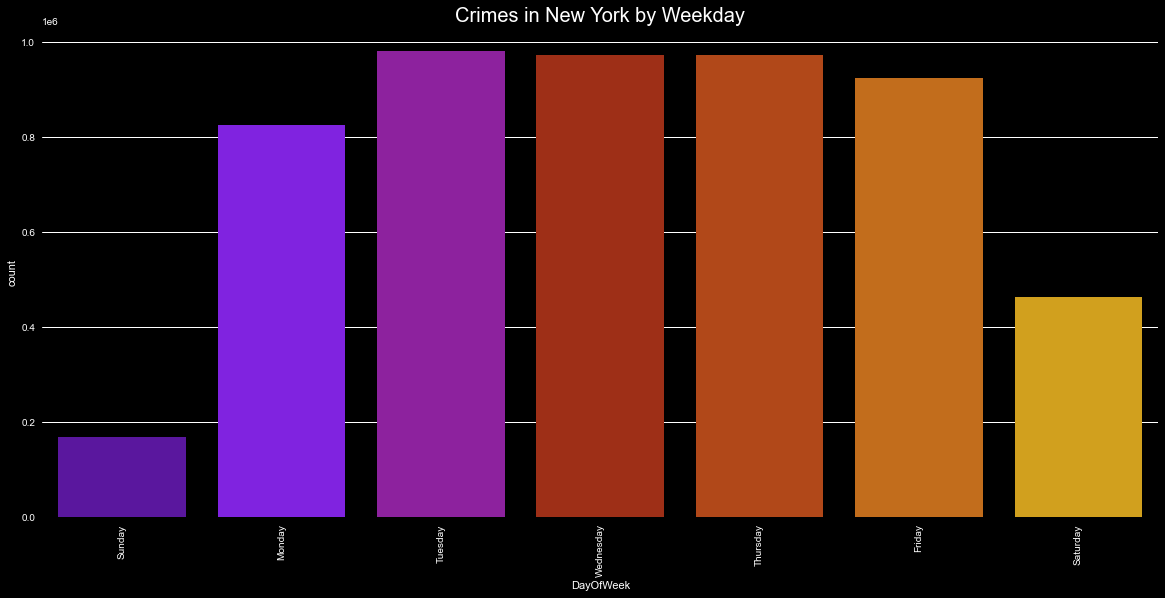

In [30]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['DayOfWeek'], palette = 'gnuplot', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

plt.title('Crimes in New York by Weekday', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

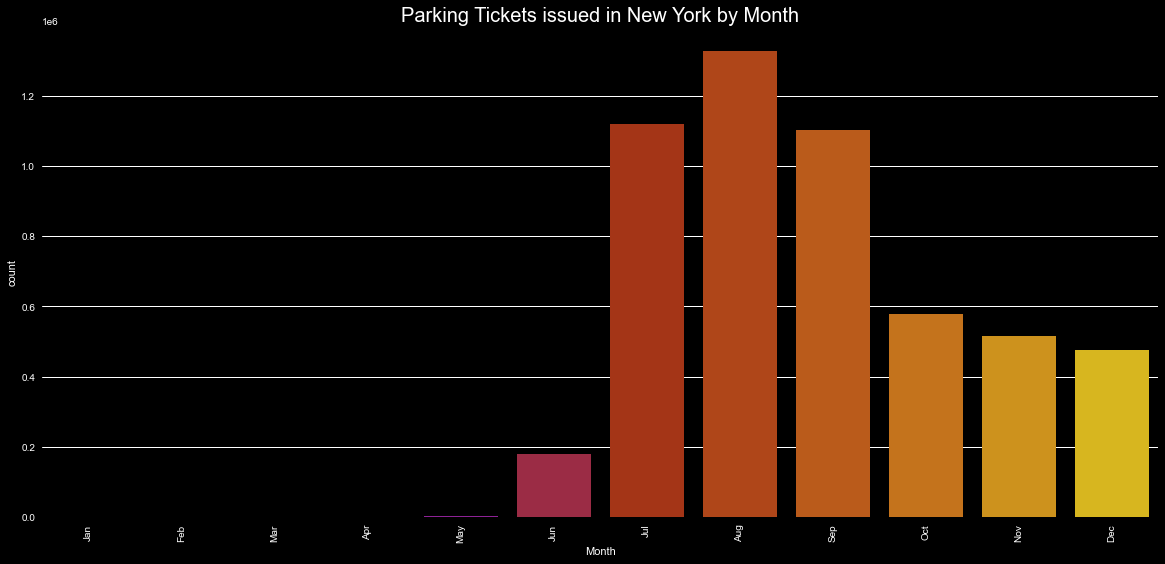

In [31]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['Month'], palette = 'gnuplot', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.title('Parking Tickets issued in New York by Month', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

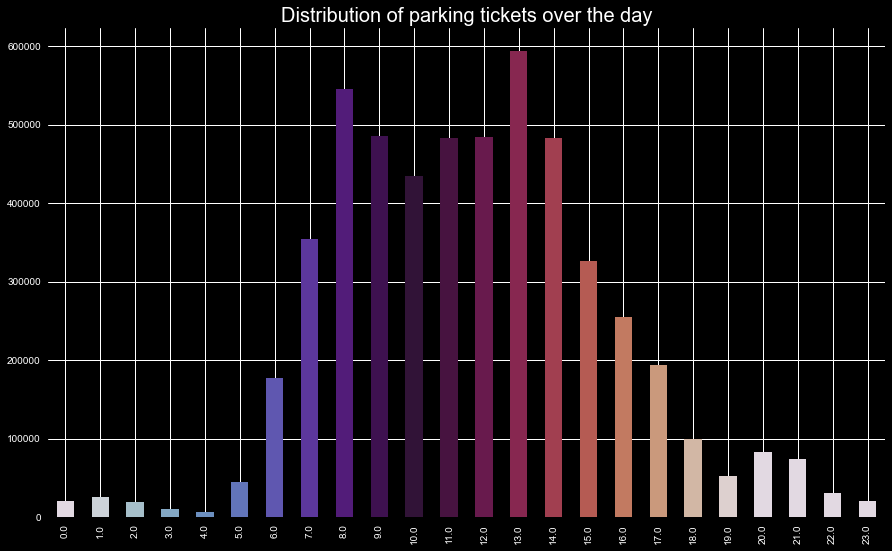

In [32]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['Hour'].value_counts().sort_index().plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of parking tickets over the day', fontsize = 20)
plt.show()

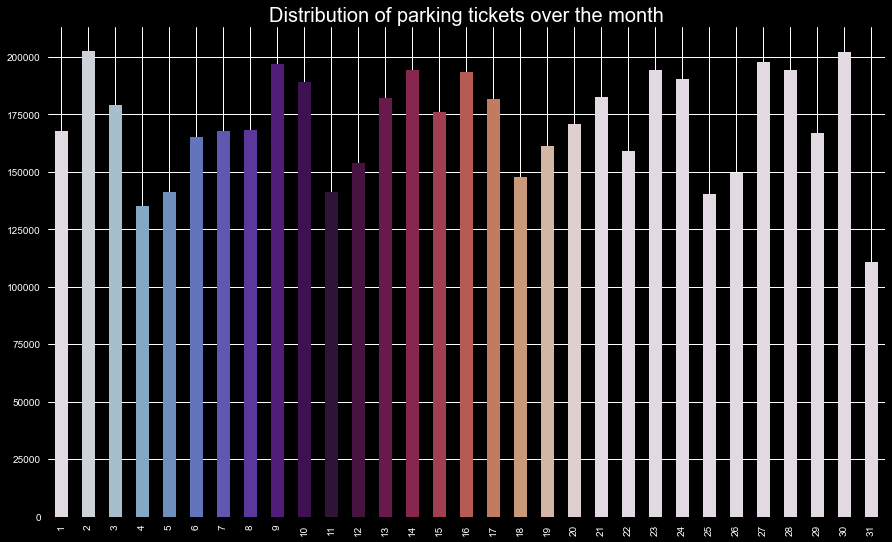

In [33]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['Day'].value_counts().sort_index().plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of parking tickets over the month', fontsize = 20)
plt.show()

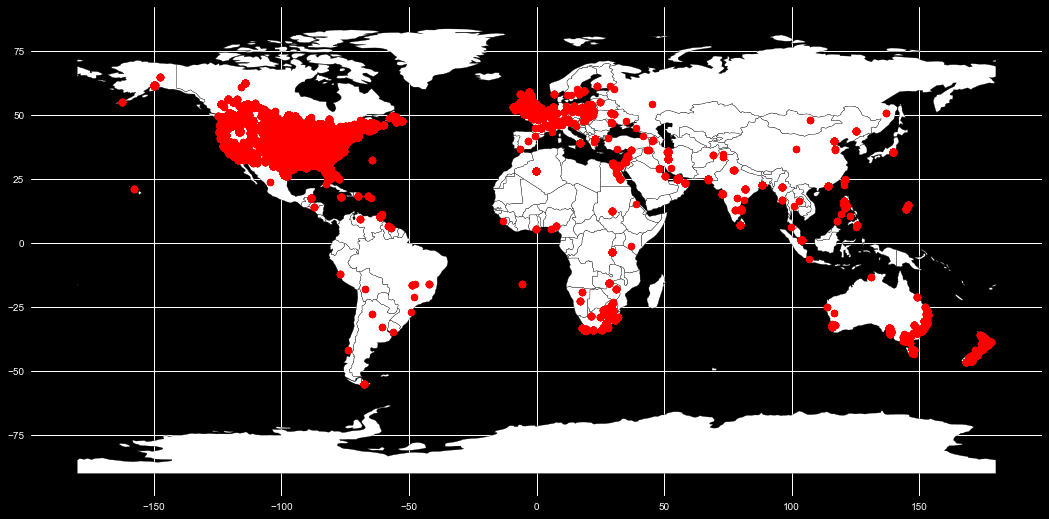

In [34]:
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.longitude, gdf.latitude))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
train_gdf.plot(ax=ax, color='red')
plt.show()

In [35]:
start_lat = 40.494852087195035
start_long = -74.25849125907617
end_long = -73.69406865850719
end_lat = 40.91855065438233

after_start_lat = df["latitude"] >= start_lat
before_end_lat = df["latitude"] <= end_lat
between_two_lats = after_start_lat & before_end_lat

after_start_long = df["longitude"] >= start_long
before_end_long = df["longitude"] <= end_long
between_two_longs = after_start_long & before_end_long

df = df.loc[between_two_lats]
df = df.loc[between_two_longs]

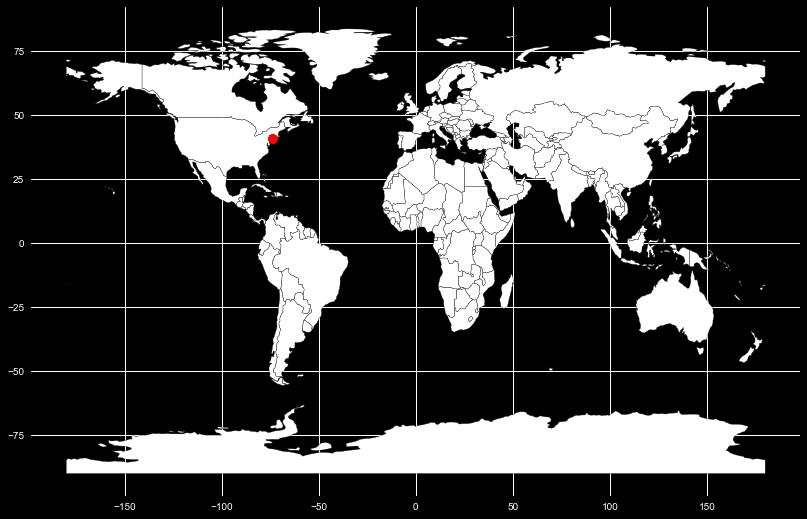

In [36]:
train_gdf = create_gdf(df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
train_gdf.plot(ax=ax, color='red')
plt.show()

In [37]:
nb = 'data/Police Precincts/geo_export_4e4c80fb-a2b9-47d1-83ba-2b0eb65da799.shp'
regions = gpd.read_file(nb)

regions.sample(5)

precinct    shape_area     shape_leng  \
37      60.0  8.820288e+07   66234.281628   
71     114.0  1.799513e+08  114780.223193   
56      94.0  6.558919e+07   44334.505309   
0        1.0  4.731402e+07   80963.495197   
33      49.0  1.058100e+08   45768.175922   

                                             geometry  
37  POLYGON ((-73.98372 40.59582, -73.98305 40.595...  
71  MULTIPOLYGON (((-73.94180 40.76905, -73.94257 ...  
56  POLYGON ((-73.92468 40.71989, -73.93161 40.718...  
0   MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...  
33  POLYGON ((-73.82824 40.86102, -73.82833 40.860...

In [38]:
regions['precinct'] = regions['precinct'].astype(int)

In [39]:
df['Violation Precinct'].unique()

array([ 71,  19,  84,  89,  80,  88,  67,  81,  86, 108, 114,  78,  62,
       115,  45, 163,  46, 122,   0, 111, 100,  69,  68,  25,  23,  34,
        63,  77,  76,  40,  48,  32,  28,  30,  52,  44,  50,  18,  14,
        17,  49,  47, 109,  60,  61,  43,  41, 112,  20, 103, 106, 110,
       102, 104,  83,  90,  10,   9,   7,   5,  13,  26,  24,  33,   6,
         1, 120, 101,  79, 121, 107, 113,  66,  42,  22, 105,  72,  70,
        75,  73,  94, 123,  93,  38,  15,  96,  64,  65,  36,   4,  37,
       809,  35,  87,  95,  56,  82, 808,   3,  53,  11,  39, 134,  16],
      dtype=int64)

In [40]:
df_count = df[["Violation Precinct","Hour"]].groupby(by=["Violation Precinct"]).count()
df_count.rename(columns = {'Hour':'PrecinctCount'}, inplace = True)
df_count['latitude'] = df[["Violation Precinct","latitude"]].groupby(by=["Violation Precinct"]).median()
df_count['longitude'] = df[["Violation Precinct","longitude"]].groupby(by=["Violation Precinct"]).median()
df_count = df_count.reset_index()  

df_count

Violation Precinct  PrecinctCount   latitude  longitude
0                     0         285311  40.721673 -73.869167
1                     1          53385  40.717900 -74.007032
2                     3              1  40.594529 -73.888035
3                     4              6  40.795262 -73.962424
4                     5          28295  40.720532 -73.995109
..                  ...            ...        ...        ...
99                  123           1494  40.540165 -74.193763
100                 134              1  40.864954 -73.925232
101                 163             17  40.871585 -73.805642
102                 808              2  40.833741 -73.879581
103                 809              1  40.774002 -73.935870

[104 rows x 4 columns]

In [41]:
len(regions['precinct'].unique())

77

In [42]:
merged = regions.set_index('precinct').join(df_count.set_index('Violation Precinct'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged.sample(5)

precinct    shape_area     shape_leng  \
1          5  1.808880e+07   18676.124267   
53        84  3.546288e+07   38087.656479   
46        75  1.803842e+08  106039.988150   
72       115  1.133400e+08   60037.787386   
48        76  4.823965e+07   68155.187882   

                                             geometry  PrecinctCount  \
1   POLYGON ((-73.98864 40.72293, -73.98869 40.722...          28295   
53  POLYGON ((-73.97903 40.70595, -73.97903 40.705...          48005   
46  MULTIPOLYGON (((-73.85023 40.62332, -73.85023 ...          20720   
72  POLYGON ((-73.85908 40.76252, -73.85943 40.762...          80922   
48  POLYGON ((-74.00174 40.69241, -74.00050 40.691...           3773   

     latitude  longitude  
1   40.720532 -73.995109  
53  40.692759 -73.991710  
46  40.664486 -73.883932  
72  40.750405 -73.884876  
48  40.681277 -73.996791

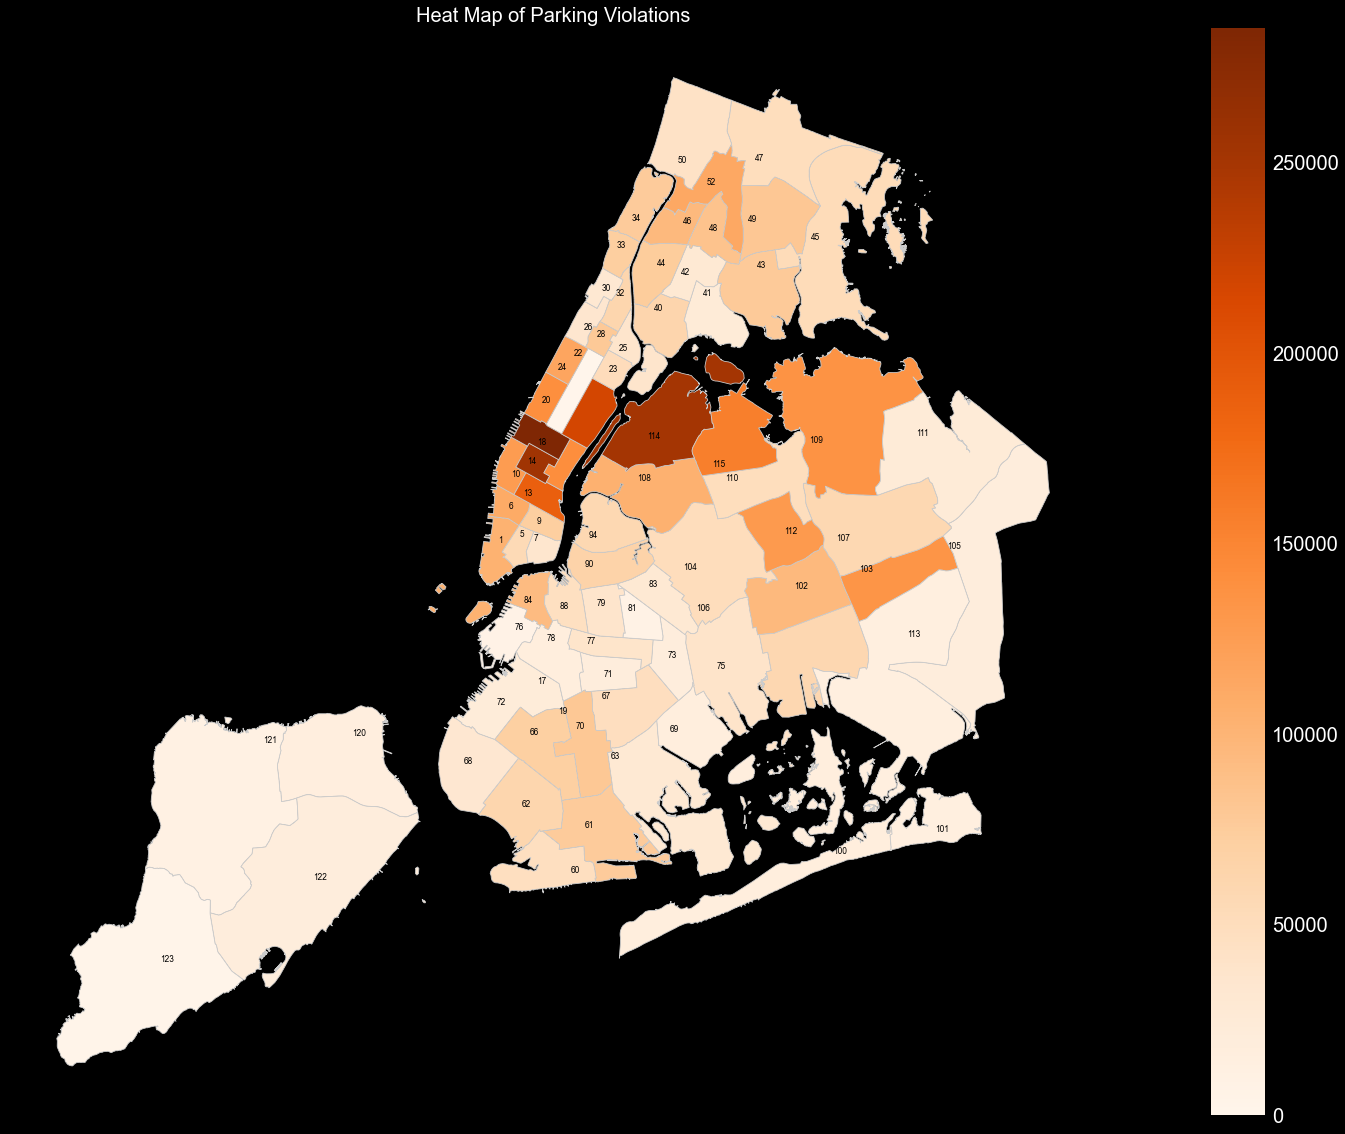

In [76]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Parking Violations', fontdict={'fontsize': '20', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 285311
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('PrecinctCount', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

for idx, row in merged.iterrows():
    if(row['PrecinctCount'] > 50):
        plt.annotate(s=row['precinct'], xy=(row['longitude'], row['latitude']),
                 horizontalalignment='center', fontsize='small', color='black', wrap=True)

plt.show()

In [45]:
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_wm = nyc.to_crs({'init':'epsg:3857'})

In [49]:
max_amount = df_count['PrecinctCount'].max()

hmap = folium.Map([40.7048781, -73.9035298], zoom_start=10)

hm_wide = HeatMap( list(zip(df_count.latitude.values, df_count.longitude.values, df_count.PrecinctCount.values.astype(float))),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

folium.GeoJson(nyc_wm).add_to(hmap)
hmap.add_child(hm_wide)

In [ ]:
#K-means


In [57]:
df_with_precinct = df[['Violation Precinct', 'latitude','longitude']]

In [61]:
#data = df[['longitude','latitude','Hour', 'Weekday']]
X = df[['longitude','latitude']]
#pca = PCA(n_components=2).fit(data)
#X = pca.transform(data)
X

longitude   latitude
0       -73.943163  40.655757
1       -73.943163  40.655757
2       -73.943163  40.655757
3       -73.943163  40.655757
4       -73.943163  40.655757
...            ...        ...
6584960 -73.896929  40.868639
6584961 -73.896929  40.868639
6584962 -73.896929  40.868639
6584963 -73.896929  40.868639
6584964 -73.966792  40.576136

[3085724 rows x 2 columns]

In [ ]:
#X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)
#plt.scatter(X.iloc[:,0], X.iloc[:,1])

Text(0, 0.5, 'WCSS')

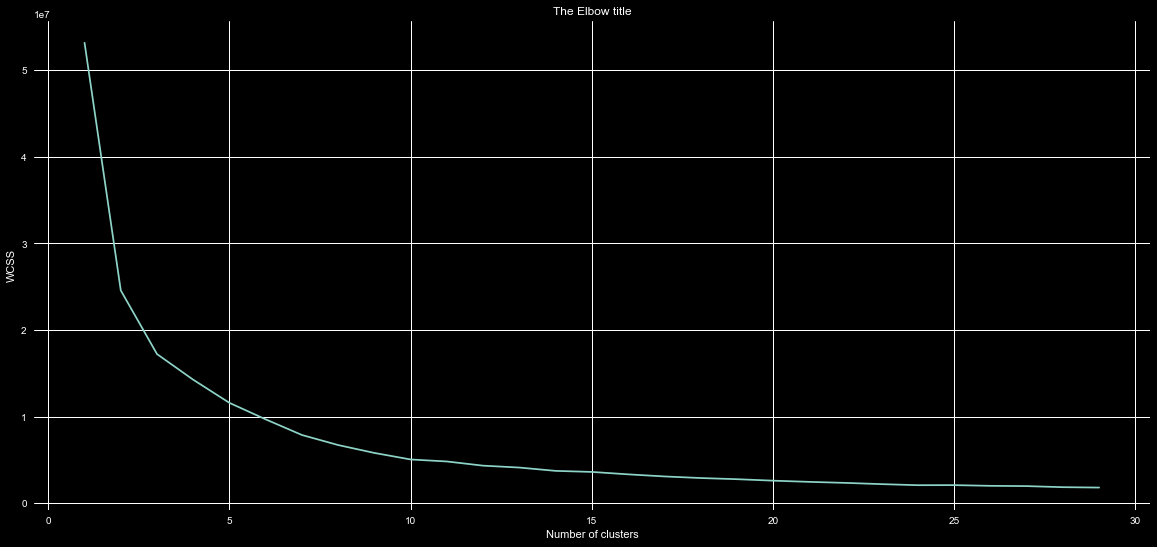

In [51]:
wcss=[]
for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [53]:
#choosign 25 as the optimum cluster size
wcss[25]

2007136.2225659029

In [ ]:
#Categorizing the data using the optimum number of clusters (8) we determined in the last step. 
#k-means++ ensures that you get don’t fall into the random initialization trap.

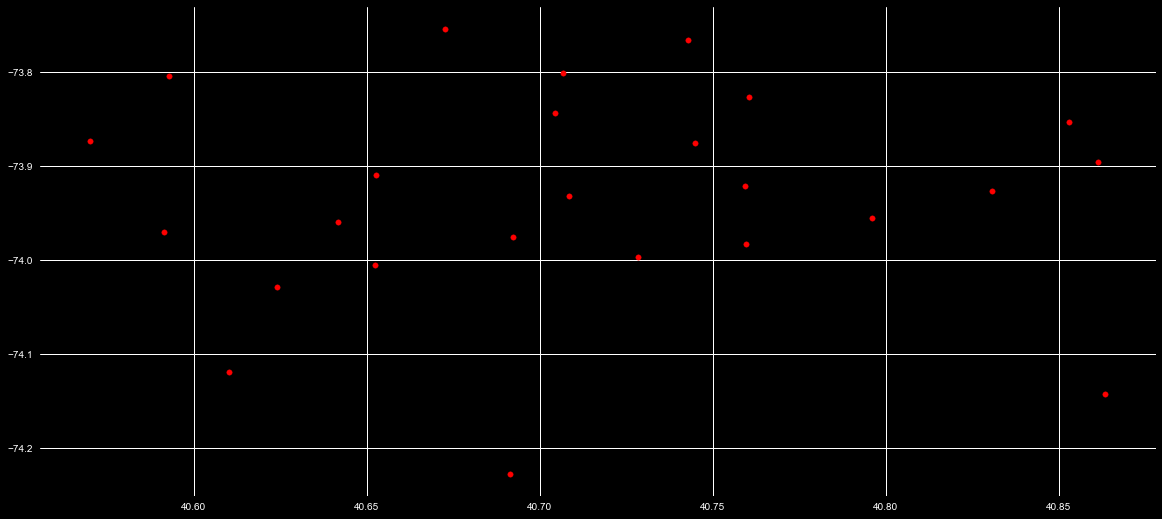

In [73]:
kmeans = KMeans(n_clusters=25, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
#plt.scatter(X.iloc[:,0], X.iloc[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=30, c='red')
#plt.show()

In [74]:
data_with_clusters = df_with_precinct.copy()
data_with_clusters['Clusters'] = pred_y

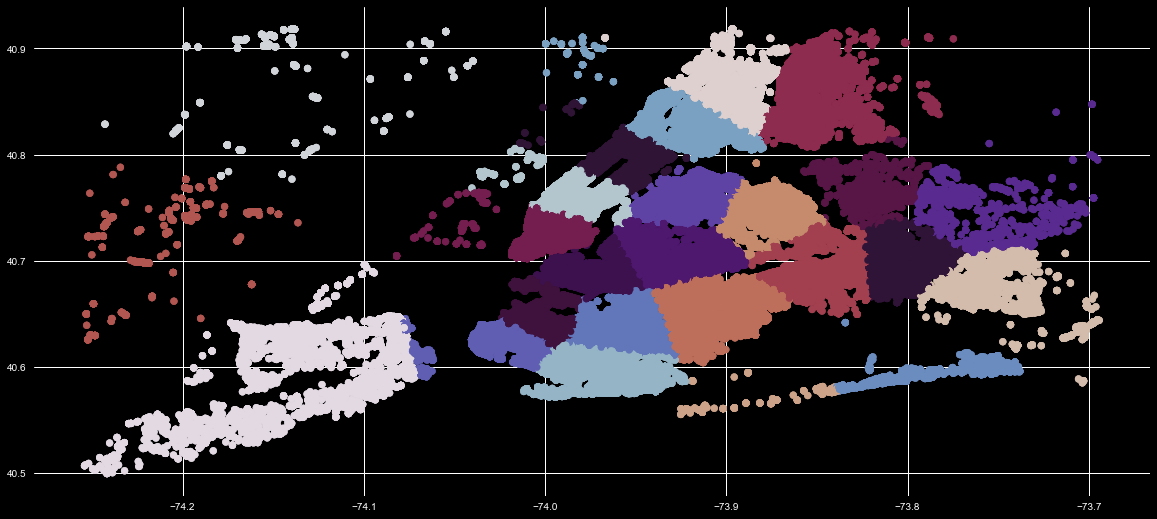

In [75]:
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Clusters'],cmap='twilight_shifted_r')

In [ ]:
kmeans.predict([[40.576136,-73.906792]])

In [ ]:
len(identified_clusters)

In [ ]:
data_with_clusters.head()

In [ ]:
data_with_clusters.shape

In [ ]:
merged.shape

In [ ]:
clusterCounts = data_with_clusters[["Clusters","latitude"]].groupby(by=["Clusters"]).count()
clusterCounts.rename()

In [ ]:
data_with_clusters[34:35]

In [ ]:
clusterCounts

In [ ]:
clusterCounts.rename(columns = {'latitude':'ClusterCount'}, inplace = True)
mergedC = data_with_clusters.set_index('Clusters').join(clusterCounts)
mergedC = mergedC.reset_index()
mergedC = mergedC.fillna(0)
mergedC.sample(5)

In [ ]:
mergedC.shape

In [ ]:
df_count

In [ ]:
cc = mergedC[["Clusters", "ClusterCount"]]

In [ ]:
cc.drop_duplicates(inplace=True)

In [ ]:
cc.describe()

In [ ]:
bins = np.arange(0, cc['ClusterCount'].max()+1,cc['ClusterCount'].max()/3)

In [ ]:
labels = ['Safe', 'Somewhat Safe', 'Unsafe']

In [ ]:
cc['label'] = pd.cut(cc.ClusterCount, bins=bins, labels=labels, right=True)

In [ ]:
cc['ClusterCount'].max()/cc['ClusterCount'].min()

In [ ]:
cc